In [1]:
using Pkg

In [2]:
using PyPlot, StatsBase, LaTeXStrings, Distributions 

In [3]:
y = [62,45,40,55,64,53]
x = [90,86,67,89,81,75];

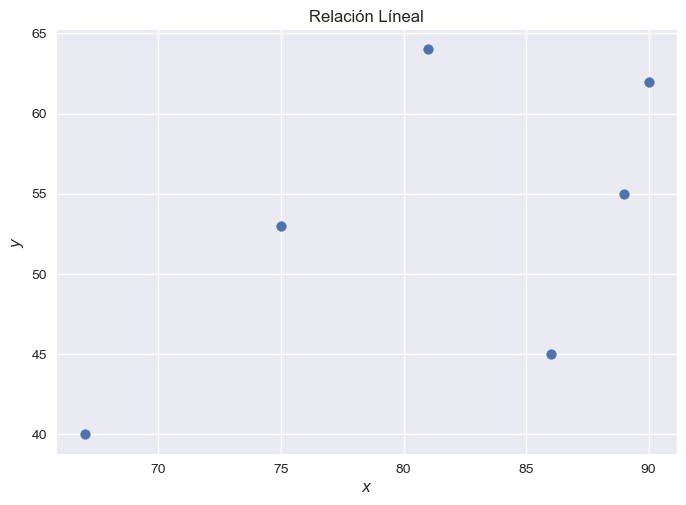

In [4]:
plt.style.use("seaborn")
##Relación lineal
scatter(x,y)
title("Relación Líneal")
xlabel(L"x")
ylabel(L"y");

In [6]:
β = sum((x .- mean(x)).*(y.-mean(y)))/sum((x .- mean(x)).^2)
α = mean(y) - β*mean(x)
(α,β)

(4.799003322259139, 0.5946843853820598)

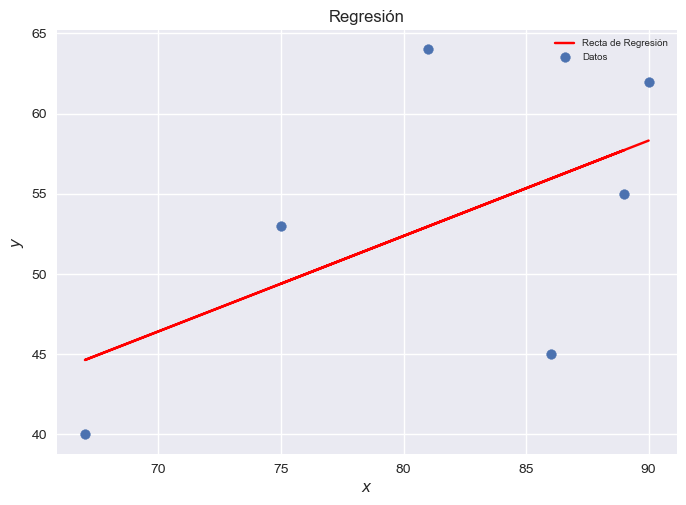

In [7]:
plot(x,α .+ β.*x,label = "Recta de Regresión", color = "red")
scatter(x,y,label = "Datos")
title("Regresión")
xlabel(L"x")
ylabel(L"y")
legend(prop = Dict("size" => 7));

In [8]:
##Eliminar punto y recalcular 
y1 = [62,45,55,64,53]
x1 = [90,86,89,81,75];

In [9]:
β1 = sum((x1 .- mean(x1)).*(y1.-mean(y1)))/sum((x1 .- mean(x1)).^2)
α1 = mean(y1) - β1*mean(x1)
(α1,β1)

(49.1640826873385, 0.07881136950904391)

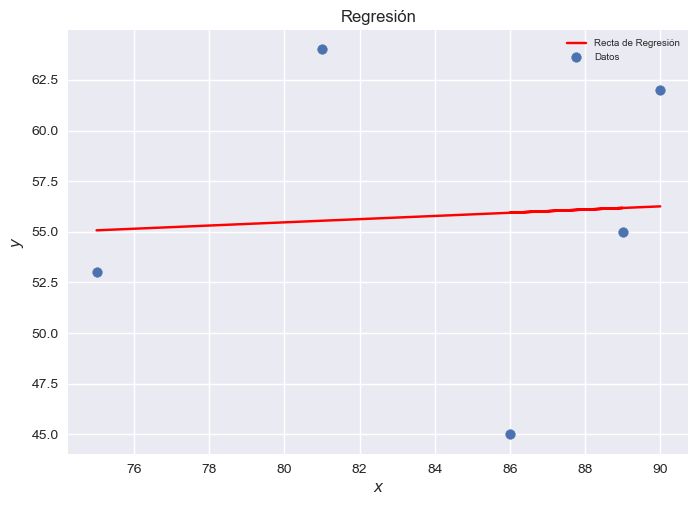

In [10]:
plot(x1,α1.+ β1.*x1,label = "Recta de Regresión", color = "red")
scatter(x1,y1,label = "Datos")
title("Regresión")
xlabel(L"x")
ylabel(L"y")
legend(prop = Dict("size" => 7));

In [11]:
##Puntual 
α + β*88 

57.131229235880404

In [13]:
n = length(x)
x0 = 88
s = sqrt(sum((y.-α.-β.*x).^2)./(n-2))
##Intervalo 
α .+ β*88 .+ [-1,1].*quantile(TDist(n-2),0.05/2).*s.*sqrt(1/n + ((x0 - mean(x))^2)/(sum((x .-mean(x)).^2)))

2-element Array{Float64,1}:
 69.72992655316803
 44.53253191859278

In [14]:
n = length(x)
x0 = 88
s = sqrt(sum((y.-α.-β.*x).^2)./(n-2))
##Intervalo 
α .+ β*88 .+ [-1,1].*quantile(TDist(n-2),0.05/2).*s.*sqrt(1 +1/n + ((x0 - mean(x))^2)/(sum((x .-mean(x)).^2)))

2-element Array{Float64,1}:
 84.1664908496017
 30.095967622159115

In [18]:
x2 = range(minimum(x),stop = maximum(x),length=100)
confl = α .+ β.*x2 .-quantile(TDist(n-2),0.05/2).*s.*(1/n.+((x2 .- mean(x)).^2)./(sum((x .-mean(x)).^2))).^(1/2)
confu = α .+ β.*x2 .+quantile(TDist(n-2),0.05/2).*s.*(1/n.+((x2 .- mean(x)).^2)./(sum((x .-mean(x)).^2))).^(1/2)
predl = α .+ β.*x2 .-quantile(TDist(n-2),0.05/2).*s.*(1 .+ 1/n .+ ((x2 .- mean(x)).^2)./(sum((x .-mean(x)).^2))).^(1/2)
predu = α .+ β.*x2 .+quantile(TDist(n-2),0.05/2).*s.*(1 .+ 1/n .+ ((x2 .- mean(x)).^2)./(sum((x .-mean(x)).^2))).^(1/2);

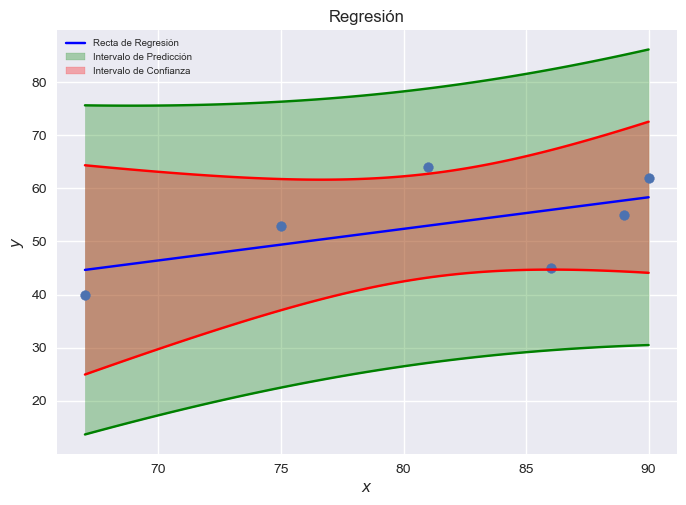

In [19]:
plot(x2, α .+ β.*x2, label = "Recta de Regresión", color = "blue")
plot(x2,confl,color="red")
plot(x2,confu,color="red")
plot(x2,predl,color="green")
plot(x2,predu,color="green")
fill_between(x2,predu,predl,alpha=0.3,color="green", label = "Intervalo de Predicción")
fill_between(x2,confu,confl,alpha=0.3,color="red",label = "Intervalo de Confianza")
scatter(x,y)
title("Regresión")
xlabel(L"x")
ylabel(L"y")
legend(prop = Dict("size" => 7));

In [27]:
##Correlaciones 
z = α.+β.*x

6-element Array{Float64,1}:
 58.32059800664452
 55.941860465116285
 44.642857142857146
 57.725913621262464
 52.96843853820599
 49.40033222591362

In [28]:
##Correlaciones y R^2 ejercicio 3
## Y gorro, X
cor(z,x)

1.0

In [29]:
#Y, Y gorro
cor(y,z)

0.5687080126001041

In [30]:
cor(y,x)

0.5687080126001041

In [34]:
SStot = sum((y .- mean(y)).^2)
SSReg = β^(2)*sum((x .- mean(x)).^2)
r2 = SSReg/SStot

0.32342880359556003

In [35]:
sqrt(r2)

0.568708012600104